In [50]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import warnings
warnings.filterwarnings('ignore')

In [51]:
df = pd.read_csv(r"E:\DataScience\intellipaat\Datasets\python Datasets\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [52]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<AxesSubplot:xlabel='Class', ylabel='count'>

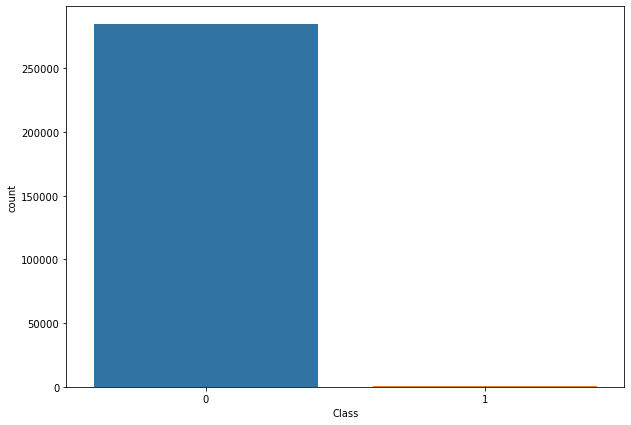

In [54]:
sns.countplot(df.Class)

In [55]:
print(df['Class'].value_counts())

0    284315
1       492
Name: Class, dtype: int64


<AxesSubplot:>

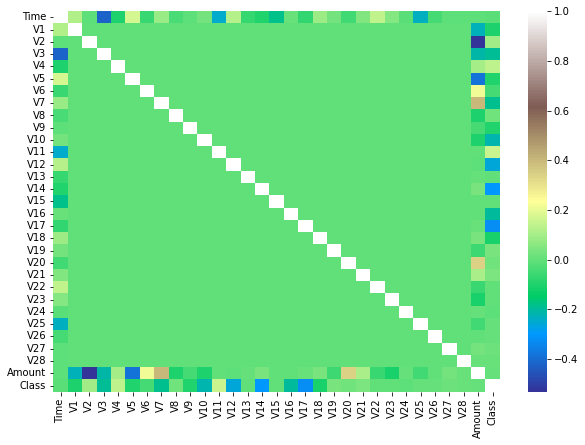

In [56]:
corr_mat = df.corr()
plt.rcParams['figure.figsize']=(10,7)
sns.heatmap(corr_mat,cmap="terrain")

In [57]:
corr_mat.Class.sort_values(ascending = False)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

#### Splitting of Data

In [58]:
from sklearn.model_selection import train_test_split

X = df.drop(['Class'], axis=1)
y = df.Class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#### Model Building

In [59]:
from sklearn import ensemble

rf = ensemble.RandomForestClassifier()
rf.fit(X_train, y_train)
y_rf = rf.predict(X_test)

#### Evaluation

In [60]:
print(classification_report(y_test, y_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.93      0.75      0.83        87

    accuracy                           1.00     56962
   macro avg       0.96      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [61]:
cm = confusion_matrix(y_test, y_rf)
print(cm)

[[56870     5]
 [   22    65]]


In [62]:
!pip install imblearn

### Undersampling

In [63]:
from imblearn.under_sampling import RandomUnderSampler 

rus = RandomUnderSampler()
X_train, y_train = rus.fit_resample(X_train, y_train)

In [64]:
y_train.value_counts()

0    405
1    405
Name: Class, dtype: int64

In [65]:
rf = ensemble.RandomForestClassifier()
rf.fit(X_train, y_train)
y_rf = rf.predict(X_test)

print(classification_report(y_test, y_rf))

cm = confusion_matrix(y_test, y_rf)
print(cm)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56875
           1       0.06      0.86      0.11        87

    accuracy                           0.98     56962
   macro avg       0.53      0.92      0.55     56962
weighted avg       1.00      0.98      0.99     56962

[[55722  1153]
 [   12    75]]


### Oversampling

In [66]:
df = pd.read_csv(r"E:\DataScience\intellipaat\Datasets\python Datasets\creditcard.csv")
X = df.drop(['Class'], axis=1)
y = df.Class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [67]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

In [68]:
y_train.value_counts()

0    227440
1    227440
Name: Class, dtype: int64

In [69]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier()
rf.fit(X_train, y_train)
y_rf = rf.predict(X_test)

In [70]:
print(classification_report(y_test, y_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.86      0.79      0.83        87

    accuracy                           1.00     56962
   macro avg       0.93      0.90      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [71]:
cm = confusion_matrix(y_test, y_rf)
print(cm)

[[56864    11]
 [   18    69]]


In [73]:
!pip install xgboost

#### Extreme Gradient Boosting

In [74]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
print(xgb.score(X_test,y_test))

0.9993504441557529


In [75]:
y_xgb = xgb.predict(X_test)

print(classification_report(y_test, y_xgb))

cm = metrics.confusion_matrix(y_test, y_xgb)
print(cm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.78      0.80      0.79        87

    accuracy                           1.00     56962
   macro avg       0.89      0.90      0.90     56962
weighted avg       1.00      1.00      1.00     56962

[[56855    20]
 [   17    70]]


In [76]:
print(classification_report(y_test, y_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.78      0.80      0.79        87

    accuracy                           1.00     56962
   macro avg       0.89      0.90      0.90     56962
weighted avg       1.00      1.00      1.00     56962



In [77]:
df = pd.read_csv(r"E:\DataScience\intellipaat\Datasets\python Datasets\creditcard.csv")
X = df.drop(['Class'], axis=1)
y = df.Class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [78]:
from xgboost import XGBClassifier
xgb = XGBClassifier(scale_pos_weight=2278/388)
# xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_xgb = xgb.predict(X_test)

In [79]:
print(classification_report(y_test, y_xgb))
cm = confusion_matrix(y_test, y_xgb)
print(cm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.93      0.77      0.84        87

    accuracy                           1.00     56962
   macro avg       0.97      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962

[[56870     5]
 [   20    67]]
